# Data Visualization検証 - PM 2.5

カラム内容の説明
```
No: row number
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration (ug/m^3)
DEWP: Dew Point (â„ƒ)
TEMP: Temperature (â„ƒ)
PRES: Pressure (hPa)
cbwd: Combined wind direction
Iws: Cumulated wind speed (m/s)
Is: Cumulated hours of snow
Ir: Cumulated hours of rain
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./data/PRSA_data_2010.1.1-2014.12.31.csv', index_col=0)

In [3]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
print(df.head().to_markdown())

|   No |   year |   month |   day |   hour |   pm2.5 |   DEWP |   TEMP |   PRES | cbwd   |   Iws |   Is |   Ir |
|-----:|-------:|--------:|------:|-------:|--------:|-------:|-------:|-------:|:-------|------:|-----:|-----:|
|    1 |   2010 |       1 |     1 |      0 |     nan |    -21 |    -11 |   1021 | NW     |  1.79 |    0 |    0 |
|    2 |   2010 |       1 |     1 |      1 |     nan |    -21 |    -12 |   1020 | NW     |  4.92 |    0 |    0 |
|    3 |   2010 |       1 |     1 |      2 |     nan |    -21 |    -11 |   1019 | NW     |  6.71 |    0 |    0 |
|    4 |   2010 |       1 |     1 |      3 |     nan |    -21 |    -14 |   1019 | NW     |  9.84 |    0 |    0 |
|    5 |   2010 |       1 |     1 |      4 |     nan |    -20 |    -12 |   1018 | NW     | 12.97 |    0 |    0 |


* 複数カラムにまたがる時刻を一つのカラムに変更
    * 参考: https://chayarokurokuro.hatenablog.com/entry/2021/07/28/065428

In [4]:
# 複数カラムでもto_datetimeで勝手に変換
df.index = pd.to_datetime(df.iloc[:, :4])
df.index.freq='H'
df.drop(df.columns[:4], axis=1, inplace=True)

In [5]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
print(df.describe().to_markdown())

|       |      pm2.5 |        DEWP |       TEMP |       PRES |        Iws |            Is |           Ir |
|:------|-----------:|------------:|-----------:|-----------:|-----------:|--------------:|-------------:|
| count | 41757      | 43824       | 43824      | 43824      | 43824      | 43824         | 43824        |
| mean  |    98.6132 |     1.81725 |    12.4485 |  1016.45   |    23.8891 |     0.0527337 |     0.194916 |
| std   |    92.0504 |    14.4334  |    12.1986 |    10.2687 |    50.0106 |     0.760375  |     1.41587  |
| min   |     0      |   -40       |   -19      |   991      |     0.45   |     0         |     0        |
| 25%   |    29      |   -10       |     2      |  1008      |     1.79   |     0         |     0        |
| 50%   |    72      |     2       |    14      |  1016      |     5.37   |     0         |     0        |
| 75%   |   137      |    15       |    23      |  1025      |    21.91   |     0         |     0        |
| max   |   994      |    28       | 

In [51]:
from pandas_profiling import ProfileReport
import popmon
from popmon import resources

In [22]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [37]:
profile.to_file("bejing_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
report = df.reset_index().pm_stability_report(time_axis="index", features=["index:pm2.5", "index:DEWP"])

2022-09-03 05:55:40,101 INFO [histogram_filler_base]: Filling 2 specified histograms. auto-binning.
100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.34s/it]
2022-09-03 05:55:42,793 INFO [hist_splitter]: Splitting histograms "hists" as "split_hists"
2022-09-03 05:55:42,948 INFO [hist_comparer]: Comparing "split_hists" with rolling sum of 1 previous histogram(s).
2022-09-03 05:55:46,945 INFO [hist_comparer]: Comparing "split_hists" with reference "split_hists"
2022-09-03 05:55:51,293 INFO [pull_calculator]: Comparing "comparisons" with median/mad of reference "comparisons"
2022-09-03 05:55:55,020 INFO [hist_profiler]: Profiling histograms "split_hists" as "profiles"
2022-09-03 05:55:55,204 INFO [pull_calculator]: Comparing "profiles" with median/mad of reference "profiles"
2022-09-03 05:56:00,575 INFO [apply_func]: Computing significance of (rolling) trend in means of features
2022-09-03 05:56:02,283 INFO [compute_tl_bounds]: Calculating static

In [39]:
report.to_file("bejing_pm25_dewp_popmon.html")

In [7]:
df['cbwd'].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

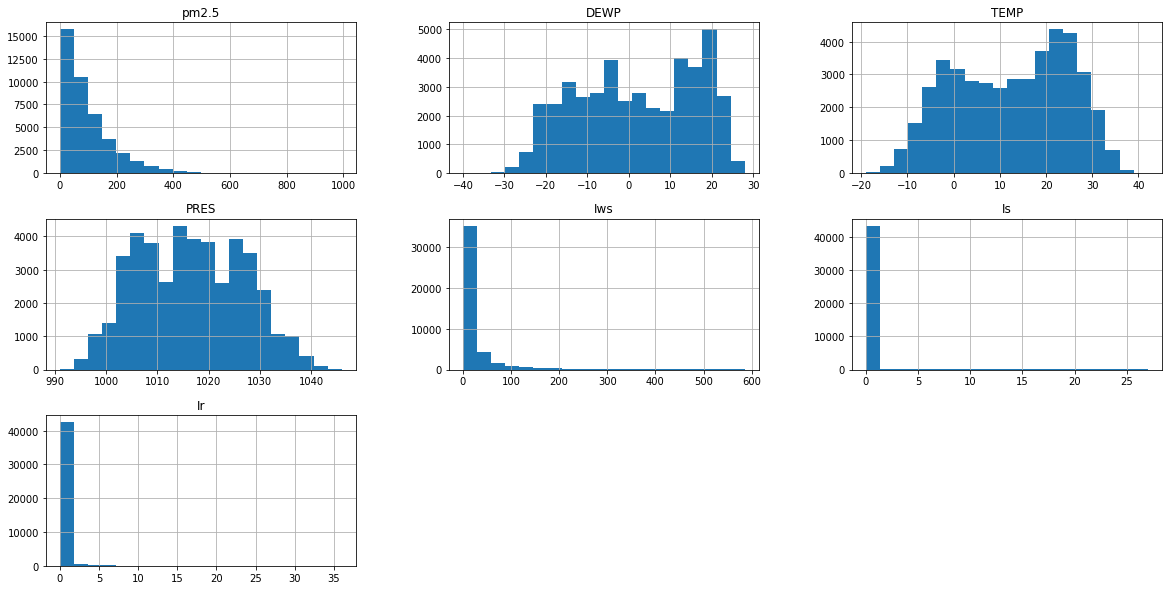

In [8]:
df.hist(figsize=(20, 10), bins=20)
plt.show()

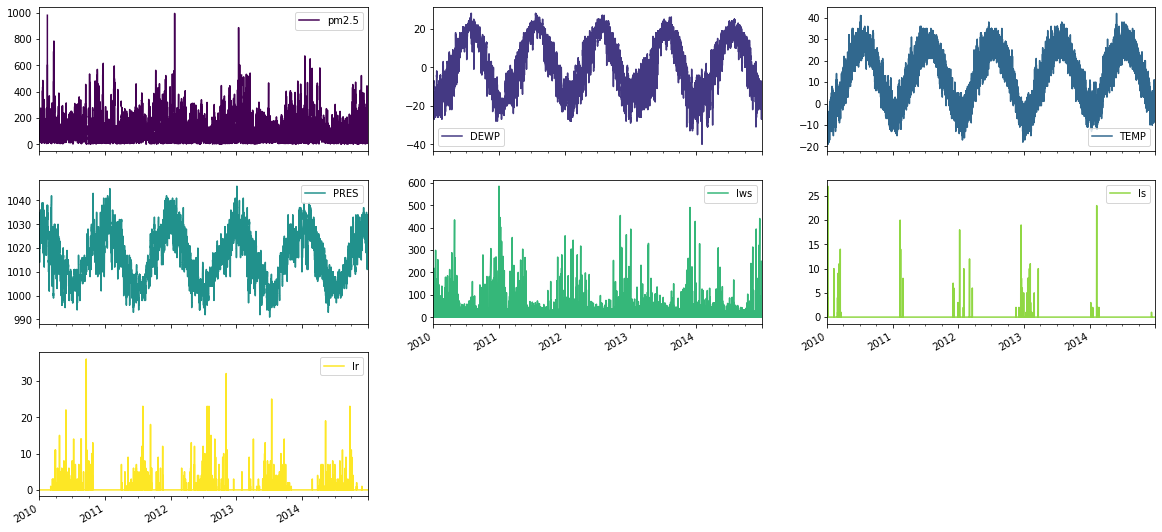

In [12]:
df.plot(subplots=True, figsize=(20, 10), layout=(-1, 3), cmap="viridis")
plt.show()

In [14]:
pd.get_dummies(df, 'cbwd', columns=['cbwd'])

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [15]:
df_dummy = pd.get_dummies(df, 'cbwd', columns=['cbwd'])

* seabornのカラーマップ
    * https://seaborn.pydata.org/tutorial/color_palettes.html

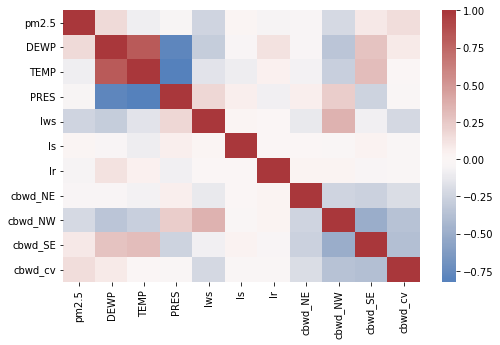

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df_dummy.corr(), center=0, cmap="vlag")
plt.show()

<AxesSubplot:ylabel='pm2.5'>

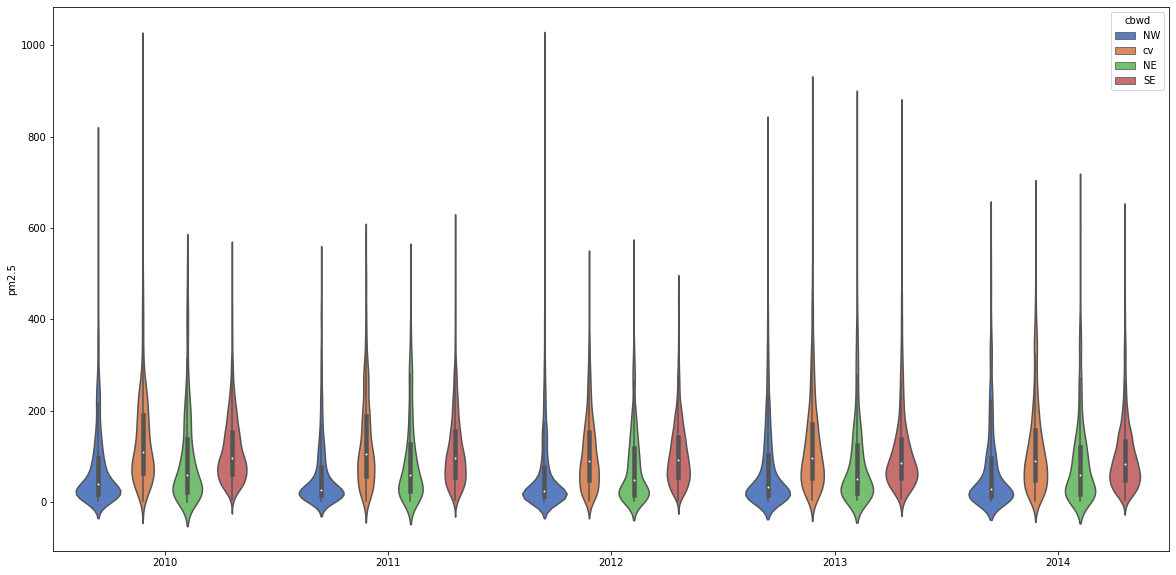

In [12]:
year = df.index.year
plt.figure(figsize=(20, 10))
sns.violinplot(x=year, y="pm2.5", hue="cbwd", data=df, palette="muted")

<AxesSubplot:xlabel='cbwd', ylabel='Iws'>

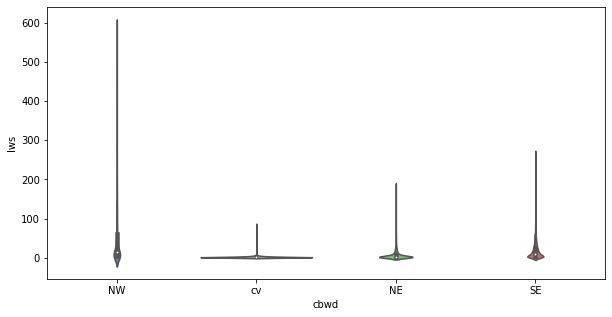

In [31]:
plt.figure(figsize=(10, 5))
sns.violinplot(y="Iws", x="cbwd", data=df, palette="muted")

<AxesSubplot:xlabel='cbwd', ylabel='log_Iws'>

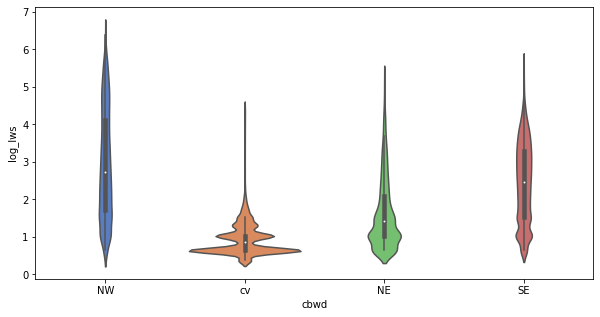

In [23]:
plt.figure(figsize=(10, 5))
df_log_Iws = df.loc[:, ['Iws', 'cbwd']]
df_log_Iws['log_Iws'] = np.log1p(df['Iws'])
sns.violinplot(y="log_Iws", x="cbwd", data=df_log_Iws, palette="muted")

* displot
    * https://seaborn.pydata.org/generated/seaborn.displot.html

<Figure size 1440x720 with 0 Axes>

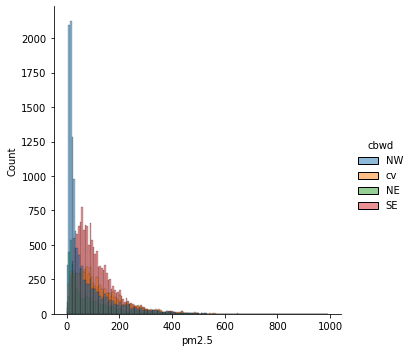

In [20]:
plt.figure(figsize=(20,10))
sns.displot(data=df[['cbwd', 'pm2.5']], x='pm2.5', hue='cbwd')
plt.show()

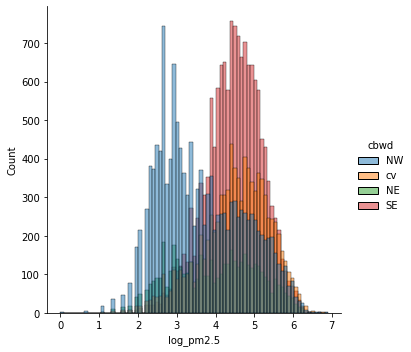

In [24]:
df['log_pm2.5'] = np.log1p(df['pm2.5'])
sns.displot(data=df[['cbwd', 'log_pm2.5']], x='log_pm2.5', hue='cbwd')
plt.show()

<AxesSubplot:xlabel='pm2.5', ylabel='Iws'>

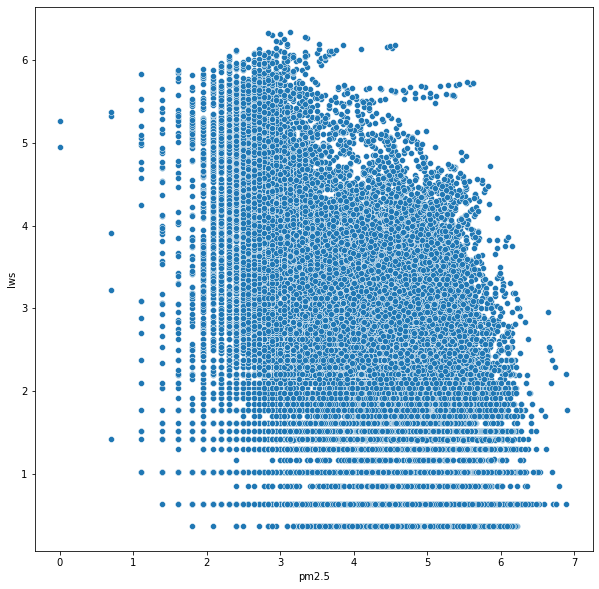

In [27]:
f, ax = plt.subplots(figsize=(10,10))
df_log = np.log1p(df.loc[:, ['Iws', 'pm2.5']])
sns.scatterplot(data=df_log, x='pm2.5', y='Iws', ax=ax)

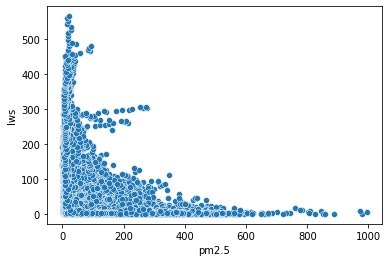

In [30]:
sns.scatterplot(data=df, x='pm2.5', y='Iws')
plt.show()

* histplot
    * https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

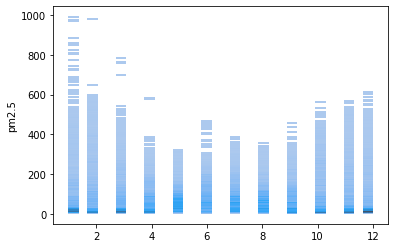

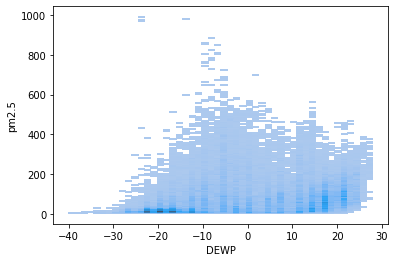

In [27]:
sns.histplot(df, x=df.index.month, y='pm2.5')
plt.show()
sns.histplot(df, x='DEWP', y='pm2.5')
plt.show()

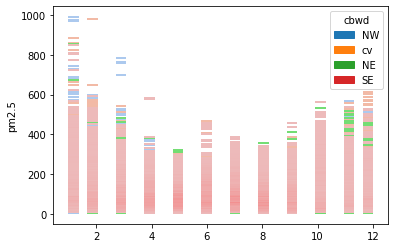

In [39]:
sns.histplot(df, x=df.index.month, y='pm2.5', hue='cbwd')
plt.show()

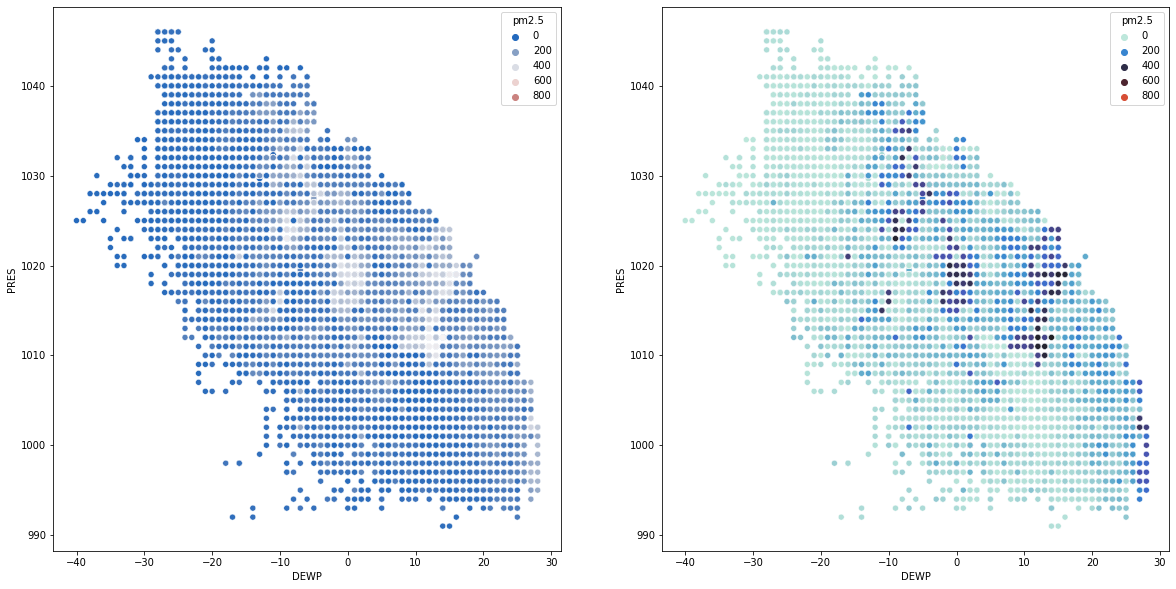

In [35]:
f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.scatterplot(data=df, x='DEWP', y='PRES', hue='pm2.5', ax=axes[0], palette='vlag')
sns.scatterplot(data=df, x='DEWP', y='PRES', hue='pm2.5', ax=axes[1], palette='icefire')
plt.show()

<AxesSubplot:xlabel='DEWP', ylabel='TEMP'>

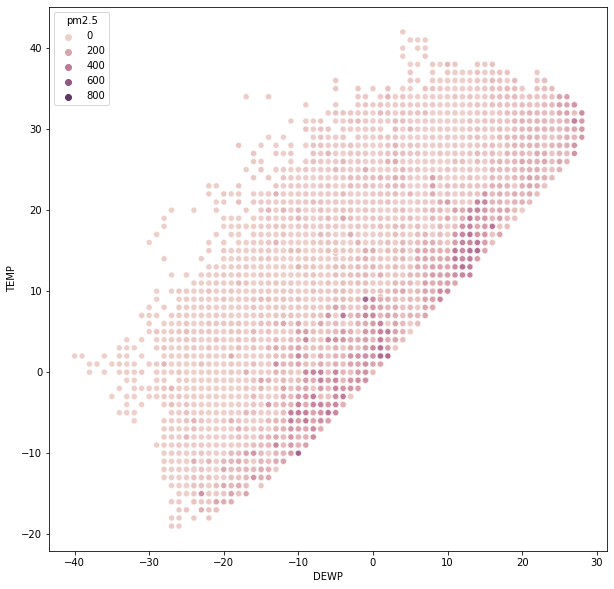

In [39]:
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='DEWP', y='TEMP', hue='pm2.5', ax=ax)

<AxesSubplot:xlabel='DEWP', ylabel='Iws'>

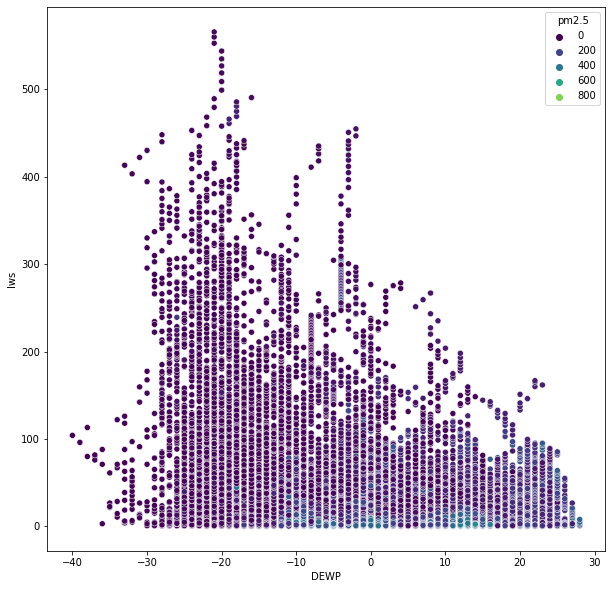

In [41]:
f, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='DEWP', y='Iws', hue='pm2.5', ax=ax, palette='viridis')

In [240]:
df.head()

,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,log_pm2.5
time,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0,NaN
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0,NaN
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0,NaN
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0,NaN
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0,NaN


<AxesSubplot:xlabel='log_pm2.5', ylabel='Iws'>

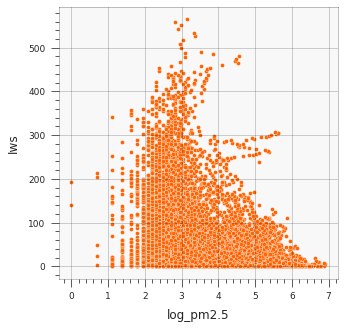

In [242]:
f, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df, x='log_pm2.5', y='Iws', ax=ax)

* lmplot
    * https://seaborn.pydata.org/examples/multiple_regression.html

In [42]:
def season_to_string(dt):
    if dt.month in [3, 4, 5]:
        return 'spring'
    elif dt.month in [6, 7, 8]:
        return 'summer'
    elif dt.month in [9, 10, 11]:
        return 'fall'
    else:
        return 'winter'
    

<Figure size 720x720 with 0 Axes>

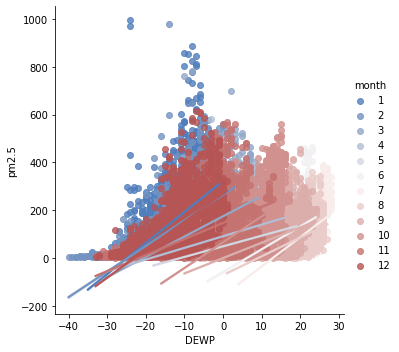

<Figure size 720x720 with 0 Axes>

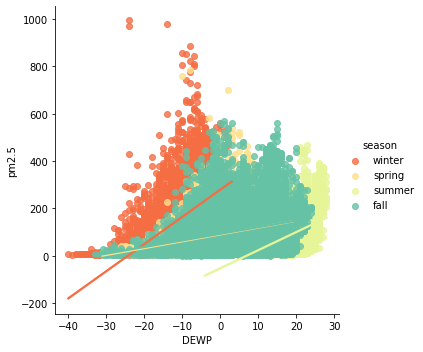

In [47]:
df_time = df.copy()
df_time['month'] = df.index.month
df_time['year'] = df.index.year
df_time['season'] = [season_to_string(dt) for dt in df.index]

plt.figure(figsize=(10,10))
sns.lmplot(data=df_time, x="DEWP", y="pm2.5", hue='month', palette='vlag')
plt.show()

plt.figure(figsize=(10,10))
sns.lmplot(data=df_time, x="DEWP", y="pm2.5", hue='season', palette='Spectral')
plt.show()

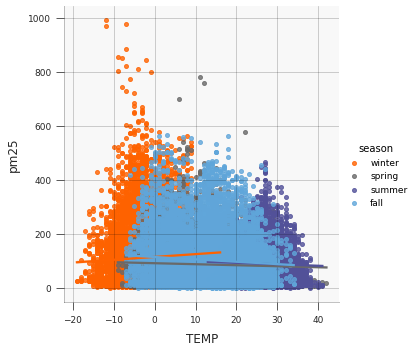

In [231]:
sns.lmplot(data=df_time, x="TEMP", y="pm25", hue='season')
plt.show()

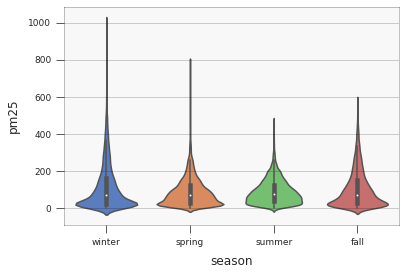

In [236]:
sns.violinplot(x='season', y="pm25", data=df_time, palette="muted")
plt.show()

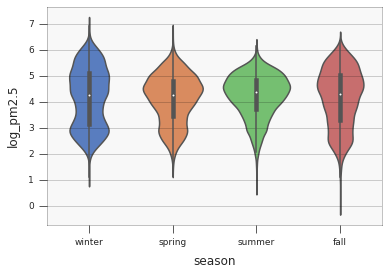

In [237]:
sns.violinplot(x='season', y="log_pm2.5", data=df_time, palette="muted")
plt.show()

* regression plot
    * https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

In [73]:
from statsmodels.formula.api import ols

In [80]:
df.rename(columns={'pm2.5': 'pm25'}, inplace=True)

In [81]:
df_model = ols("pm25 ~ TEMP + DEWP", data=df).fit()

In [82]:
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5107.
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:            -2.4352e+05
No. Observations:               41757   AIC:                         4.870e+05
Df Residuals:                   41754   BIC:                         4.871e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.6947      0.771    204.657      0.000     156.184     159.205
TEMP          -5.4531      0.059    -93.203      0.000      -5.568      -5.338
DEWP           4.8827      0.049     98.934      0.000       4.786       4.979
==============================================================================
Omnibus:                    14965.289   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70609.349
Skew:                           1.693   Prob(JB):                         0.00
Kurtosis:                       8.396   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* ARIMA
    * https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html
* 参考
    * https://esu-ko.hatenablog.com/entry/2020/08/04/Python%E3%81%A7%E6%99%82%E7%B3%BB%E5%88%97%E8%A7%A3%E6%9E%90%E3%81%8C%E3%81%97%E3%81%9F%E3%81%84(ARIMA)

In [90]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [98]:
arma_mod = ARIMA(df['pm25'], order=(1, 0, 0), trend="n")
arma_res = arma_mod.fit()

/home/jovyan/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/home/jovyan/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/home/jovyan/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [99]:
arma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   pm25   No. Observations:                43824
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -192391.080
Date:                Sat, 19 Mar 2022   AIC                         384786.161
Time:                        11:10:40   BIC                         384803.536
Sample:                    01-01-2010   HQIC                        384791.637
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9837      0.000   2328.876      0.000       0.983       0.985
sigma2       584.0436      0.622    939.123      0.000     582.825     585.263
===================================================================================
Ljung-Box (L1) (Q):                1536.81   Jarque-Bera (JB):          15672730.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        95.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

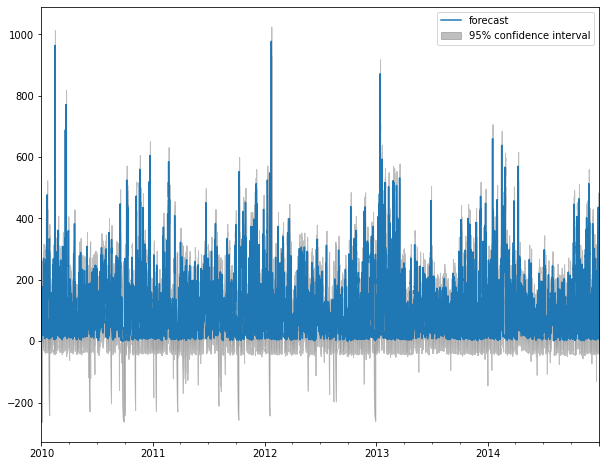

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(arma_res, ax=ax)

* influence plot
    * https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html
    * https://towardsdatascience.com/linear-regression-models-and-influential-points-4ee844adac6d

In [209]:
from statsmodels.formula.api import ols

In [223]:
model = ols("pm25 ~ DEWP + TEMP", data=df.iloc[100:200, :]).fit()

In [224]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     71.10
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           9.76e-20
Time:                        08:28:10   Log-Likelihood:                -520.76
No. Observations:                 100   AIC:                             1048.
Df Residuals:                      97   BIC:                             1055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    382.1214     29.937     12.764      0.000     322.705     441.538
DEWP          17.0102      1.437     11.840      0.000      14.159      19.862
TEMP          -5.6329      1.694     -3.326      0.001      -8.994      -2.272
==============================================================================
Omnibus:                        4.267   Durbin-Watson:                   0.511
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                4.035
Skew:                           0.286   Prob(JB):                        0.133
Kurtosis:                       3.801   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* H levarage x Studentized resduals
    * https://akitoshiblogsite.com/linear-multiple-regression-statsmodel/
    * H levarage: 他の点からどれくらい離れているかの指標
        * H levarageが高い = 回帰曲線に乗っていても周りにサンプルがなければ大きくなる。目的変数が1大きくなった時の予測値の変化量
        * https://betashort-lab.com/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9/%E7%B5%B1%E8%A8%88%E5%AD%A6/%E3%81%A6%E3%81%93%E6%AF%94%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90/
    * Studentized residuals: 回帰曲線からの誤差
        * https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%81%E3%83%A5%E3%83%BC%E3%83%87%E3%83%B3%E3%83%88%E5%8C%96%E6%AE%8B%E5%B7%AE
        * 残差（推定値と目的変数の差分）を誤差（真の回帰式と観測値の差分）の標準偏差で割ったもの。
    * ２つの指標を換算して影響の大きいもののバブルを大きくする

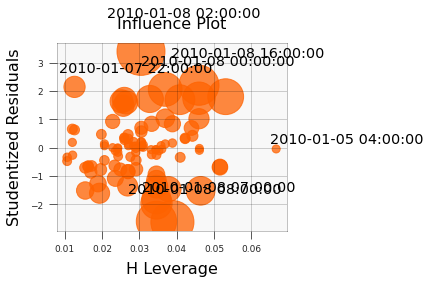

In [225]:
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

* 自己相関

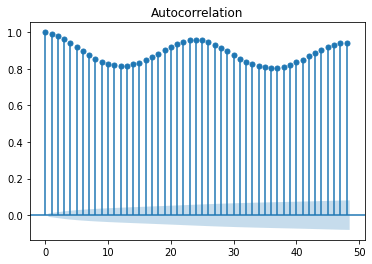

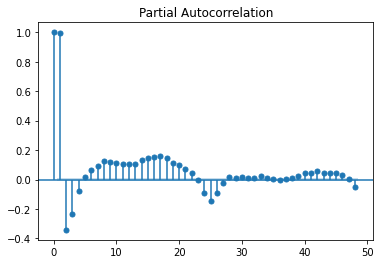

In [49]:
sm.graphics.tsa.plot_acf(df['TEMP'], lags=48)
plt.show()
sm.graphics.tsa.plot_pacf(df['TEMP'], lags=48)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


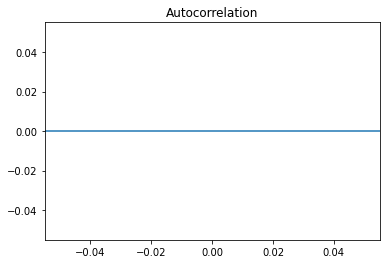

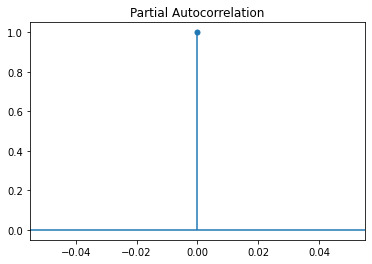

In [48]:
sm.graphics.tsa.plot_acf(df['pm2.5'], lags=48)
plt.show()
sm.graphics.tsa.plot_pacf(df['pm2.5'], lags=48)
plt.show()

In [263]:
df.head()

,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,log_pm2.5
time,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0,NaN
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0,NaN
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0,NaN
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0,NaN
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0,NaN


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


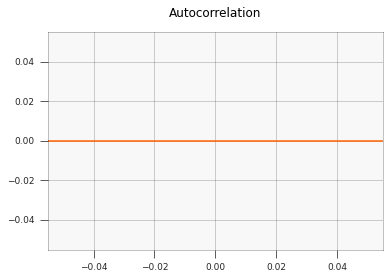

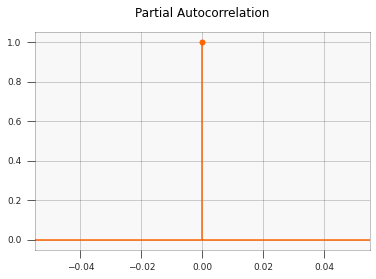

In [265]:
sm.graphics.tsa.plot_acf(df['pm25'].asfreq('1D'), lags=400)
plt.show()
sm.graphics.tsa.plot_pacf(df['pm25'].asfreq('1D'), lags=400)
plt.show()

* 相互相関

<BarContainer object of 48 artists>

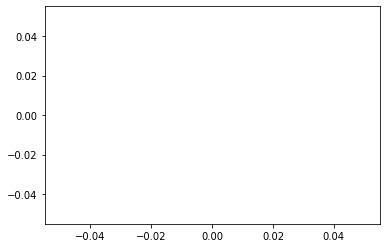

In [128]:
ccf = sm.tsa.stattools.ccf(df['pm25'], df['Iws'])
plt.bar(x=np.arange(0, 48), height=ccf[:48])

* qqplot
    * https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot
    * https://qiita.com/tmitani/items/3d366fdc49f642e11b72

In [183]:
import scipy.stats as stats

In [194]:
df.head()

,pm25,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,log_pm2.5
time,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0,NaN
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0,NaN
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0,NaN
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0,NaN
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0,NaN


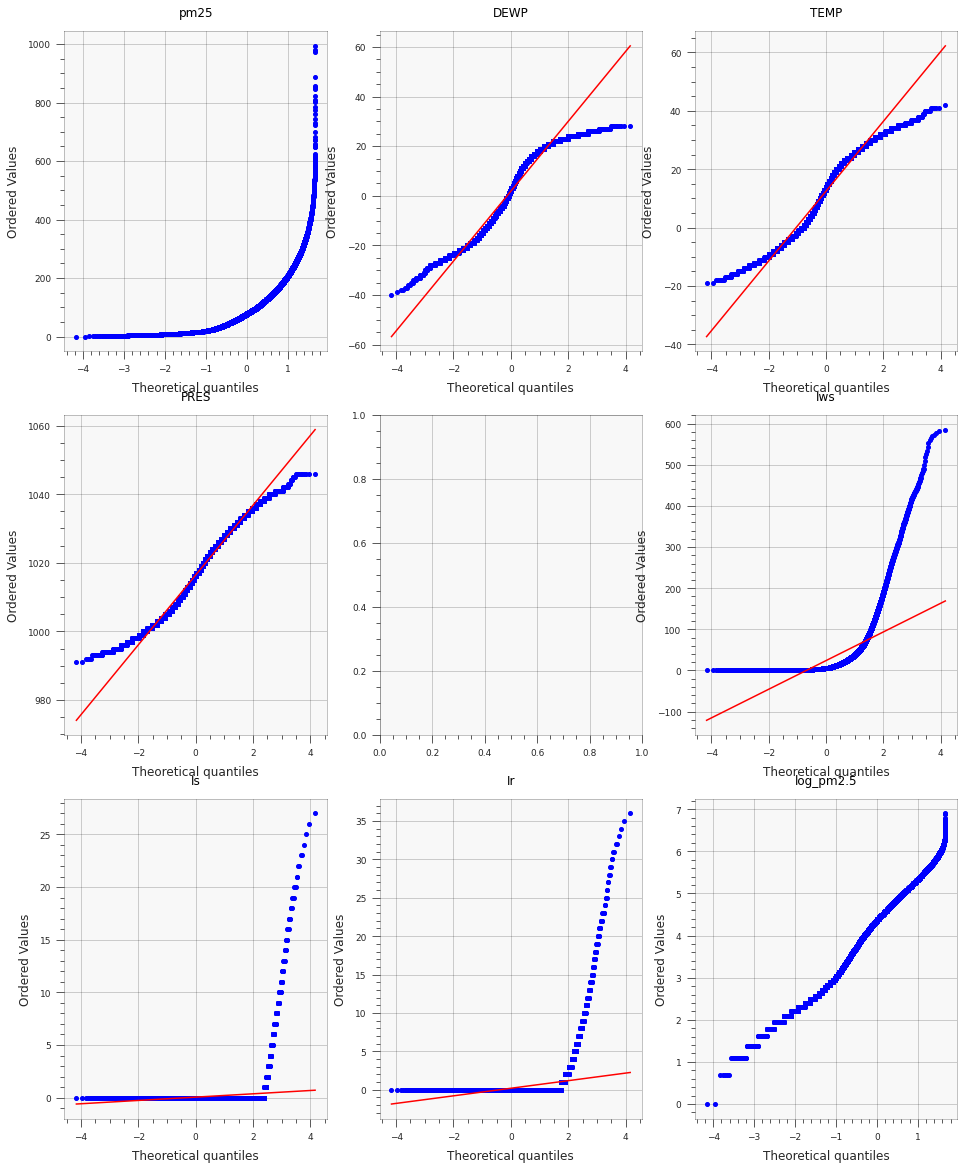

In [205]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 20))

for i, c in enumerate(df.columns):
    if df[c].dtype == 'object':
        continue
    ax = axes[i // 3, i % 3]
    stats.probplot(df[c], dist="norm", plot=ax)
    ax.set_title(c)

plt.show()

* boxcox normplot & yeojohnson
    * https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox_normplot.html#scipy.stats.boxcox_normplot

/home/jovyan/.local/lib/python3.6/site-packages/scipy/stats/morestats.py:1476: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/home/jovyan/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2522: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/jovyan/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2115: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/jovyan/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/jovyan/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2117: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/jovyan/.local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2118: RuntimeWarning: in

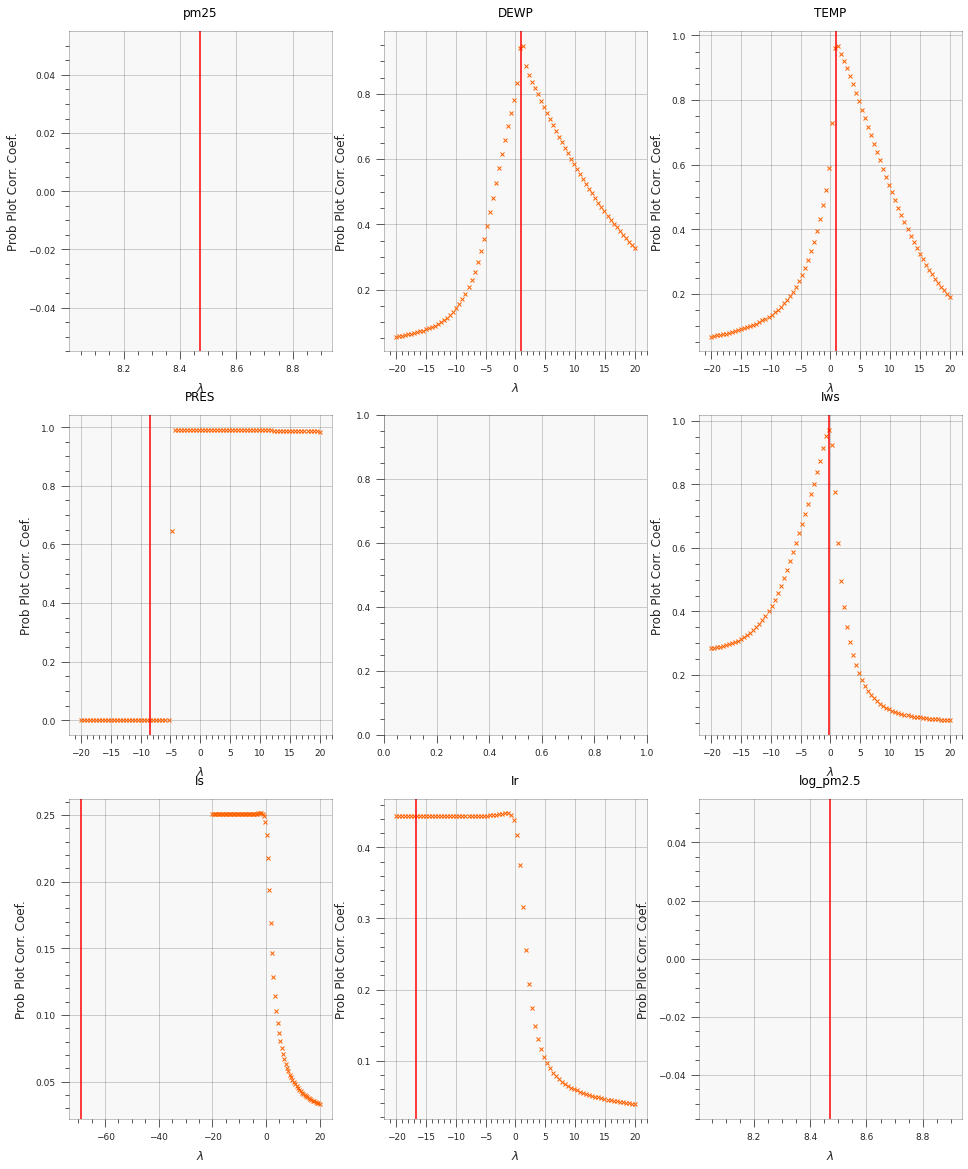

In [208]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 20))

for i, c in enumerate(df.columns):
    if df[c].dtype == 'object':
        continue
    ax = axes[i // 3, i % 3]
    stats.yeojohnson_normplot(df[c], -20, 20, plot=ax)
    _, maxlog = stats.yeojohnson(df[c])
    ax.axvline(maxlog, color='r')
    ax.set_title(c)

plt.show()

## 周波数解析
* https://www2.kaiyodai.ac.jp/~kentaro/materials/new_HP/python/16fft.html

In [243]:
from scipy import fftpack

In [259]:
#FFT
sample_freq = fftpack.fftfreq(df.shape[0], d=1.0)
y_fft = fftpack.fft(df['pm25'].interpolate(axis=0, method='linear',limit_direction='both').to_numpy())
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(y_fft)[pidxs]
freq = freqs[power.argmax()]


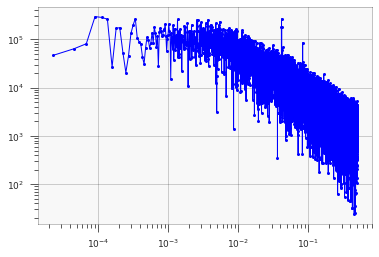

In [261]:
plt.loglog(freqs, power,'b.-',lw=1)

## 季節分解

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result = seasonal_decompose(df['pm2.5'].fillna(1.0) + 1, model='multiplicative')

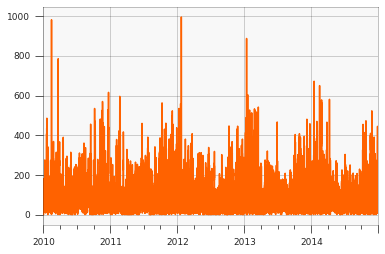

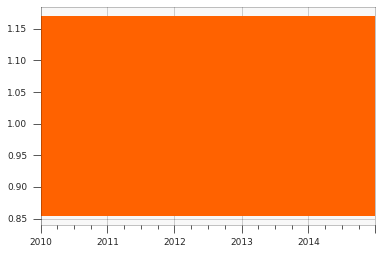

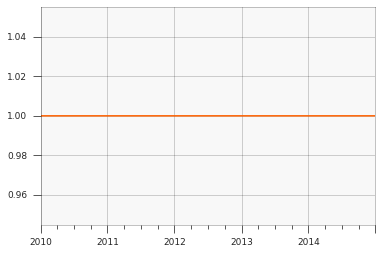

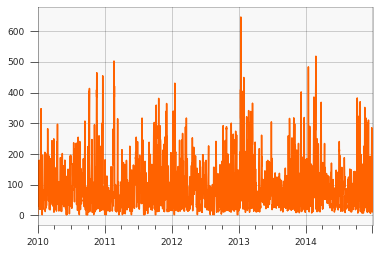

In [22]:
result.observed.plot()
plt.show()
result.seasonal.plot()
plt.show()
result.weights.plot()
plt.show()
result.trend.plot()
plt.show()

## 移動平均をかけてみる

In [ ]:
df['pm2.5'].rolling

In [24]:
roll_pm25 = df['pm2.5'].rolling(window=10, center=).mean()

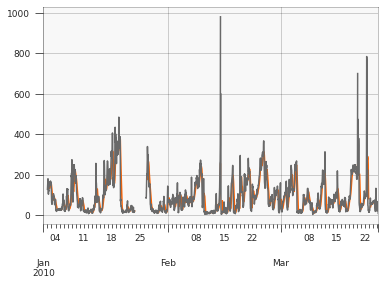

In [33]:
roll_pm25.iloc[0:2000].plot()
df['pm2.5'].iloc[:2000].plot()
plt.show()